In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Bidirectional, Conv1D, MaxPooling1D, GRU

df = pd.read_csv('/kaggle/input/spam-sms-classification-using-nlp/Spam_SMS.csv')
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df['Message'])

seq = tokenizer.texts_to_sequences(df['Message'])
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
X = seq
y = df["Class"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

X_train_padded = pad_sequences(X_train, maxlen=100)
X_test_padded = pad_sequences(X_test, maxlen=100)
X_val_padded = pad_sequences(X_val, maxlen=100)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_val_categorical = to_categorical(y_val)


In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

model1 = Sequential()
model1.add(Embedding(10000, 100))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(
    X_train_padded, y_train_categorical,
    epochs=10, batch_size=64,
    validation_data=(X_val_padded, y_val_categorical),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.8442 - loss: 0.3682 - val_accuracy: 0.9756 - val_loss: 0.0809 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9870 - loss: 0.0466 - val_accuracy: 0.9857 - val_loss: 0.0475 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9917 - loss: 0.0316 - val_accuracy: 0.9857 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9979 - loss: 0.0102 - val_accuracy: 0.9871 - val_loss: 0.0456 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9987 - loss: 0.0076 - val_accuracy: 0.9871 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9900 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.9995 - loss: 0.0023 -

In [5]:
model2 = Sequential()
model2.add(Embedding(10000, 100))
model2.add(SpatialDropout1D(0.2))
model2.add(Bidirectional(LSTM(100, dropout=0.2)))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(
    X_train_padded, y_train_categorical,
    epochs=10, batch_size=64,
    validation_data=(X_val_padded, y_val_categorical),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.8551 - loss: 0.3527 - val_accuracy: 0.9785 - val_loss: 0.0708 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9861 - loss: 0.0519 - val_accuracy: 0.9857 - val_loss: 0.0458 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.9901 - loss: 0.0290 - val_accuracy: 0.9900 - val_loss: 0.0444 - learning_rate: 0.0010


In [6]:
model3 = Sequential()
model3.add(Embedding(10000, 100))
model3.add(SpatialDropout1D(0.2))
model3.add(GRU(100, dropout=0.2))
model3.add(Dense(2, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(
    X_train_padded, y_train_categorical,
    epochs=10, batch_size=64,
    validation_data=(X_val_padded, y_val_categorical),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8439 - loss: 0.4215 - val_accuracy: 0.9684 - val_loss: 0.0890 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9785 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9968 - loss: 0.0204 - val_accuracy: 0.9813 - val_loss: 0.0517 - learning_rate: 0.0010


In [7]:
model4 = Sequential()
model4.add(Embedding(10000, 100))
model4.add(SpatialDropout1D(0.2))
model4.add(Conv1D(64, kernel_size=3, activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(LSTM(100, dropout=0.2))
model4.add(Dense(2, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(
    X_train_padded, y_train_categorical,
    epochs=10, batch_size=64,
    validation_data=(X_val_padded, y_val_categorical),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.8785 - loss: 0.3672 - val_accuracy: 0.9713 - val_loss: 0.0863 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9866 - loss: 0.0478 - val_accuracy: 0.9857 - val_loss: 0.0465 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9936 - loss: 0.0213 - val_accuracy: 0.9871 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9975 - loss: 0.0147 - val_accuracy: 0.9900 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9982 - loss: 0.0091 - val_accuracy: 0.9885 - val_loss: 0.0480 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9998 - loss: 9.4054e-04 - val_accuracy: 0.9857 - val_loss: 0.0561 - learning_rate: 0.0010


In [8]:
model5 = Sequential()
model5.add(Embedding(10000, 100))
model5.add(SpatialDropout1D(0.2))
model5.add(LSTM(100, dropout=0.2))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(2, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model5.fit(
    X_train_padded, y_train_categorical,
    epochs=10, batch_size=64,
    validation_data=(X_val_padded, y_val_categorical),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.8737 - loss: 0.3768 - val_accuracy: 0.9770 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9860 - loss: 0.0465 - val_accuracy: 0.9842 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9958 - loss: 0.0171 - val_accuracy: 0.9885 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9965 - loss: 0.0138 - val_accuracy: 0.9871 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.9871 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9999 - loss: 9.3991e-04 - val_accuracy: 0.9799 - val_loss: 0.0551 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9994 - loss: 0.00

In [9]:
glove_path = '/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'

embedding_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

model6 = Sequential()
model6.add(Embedding(input_dim=9005, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False))
model6.add(SpatialDropout1D(0.2))
model6.add(LSTM(100, dropout=0.2))
model6.add(Dense(2, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history6 = model6.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_val_padded, y_val_categorical))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8549 - loss: 0.3277 - val_accuracy: 0.9641 - val_loss: 0.1215
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9656 - loss: 0.1099 - val_accuracy: 0.9699 - val_loss: 0.0917
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9692 - loss: 0.0867 - val_accuracy: 0.9756 - val_loss: 0.0786
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9727 - loss: 0.0790 - val_accuracy: 0.9756 - val_loss: 0.0755
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9692 - loss: 0.0878 - val_accuracy: 0.9799 - val_loss: 0.0670
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9762 - loss: 0.0691 - val_accuracy: 0.9799 - val_loss: 0.0597
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9784 - loss: 0.0713 - val_accuracy: 0.9742 - val_loss: 0.0751
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9774 - loss: 0.0634 - val_accuracy: 0.9799 - val

Test Loss: 0.07527880370616913
Test Accuracy: 0.9741750359535217
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


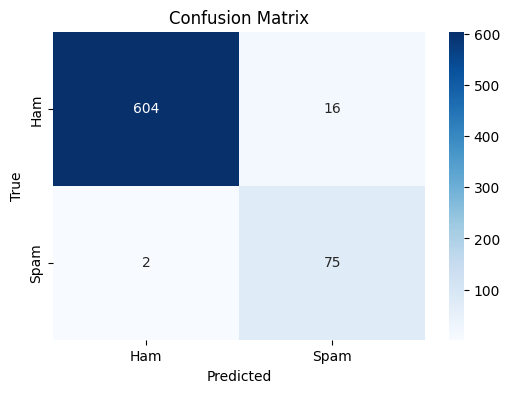

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Ensemble Model Averaging Accuracy: 0.9956958393113343


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
loss, accuracy = model6.evaluate(X_test_padded, y_test_categorical, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Confusion Matrix
y_pred = np.argmax(model6.predict(X_test_padded), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Ensemble Model Averaging
preds_model1 = model1.predict(X_test_padded)
preds_model2 = model2.predict(X_test_padded)
preds_model3 = model3.predict(X_test_padded)
preds_model4 = model4.predict(X_test_padded)
preds_model5 = model5.predict(X_test_padded)
preds_model6 = model6.predict(X_test_padded)

# Averaging the predictions
average_preds = np.mean([preds_model1, preds_model2, preds_model3, preds_model4, preds_model5, preds_model6], axis=0)

# Get final predictions by selecting the class with the highest average score
final_preds = np.argmax(average_preds, axis=1)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, final_preds)
print(f'Ensemble Model Averaging Accuracy: {ensemble_accuracy}')


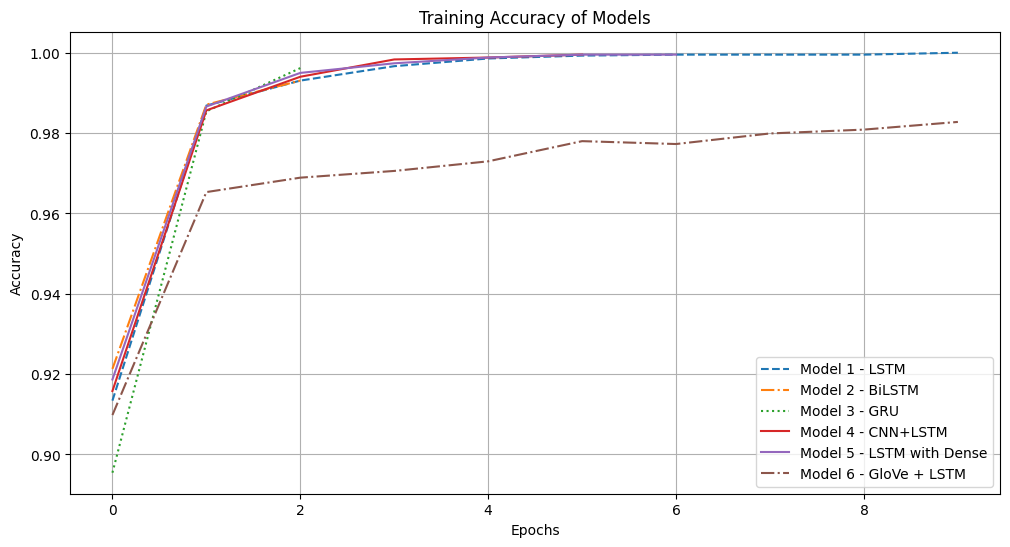

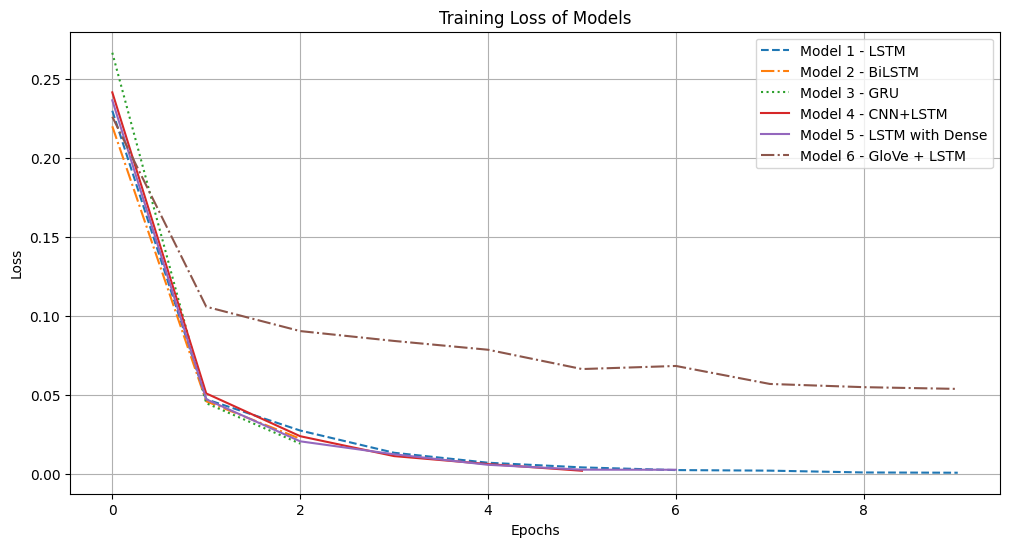

In [12]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy for all models
def plot_accuracy(history1, history2, history3, history4, history5, history6):
    plt.figure(figsize=(12, 6))

    plt.plot(history1.history['accuracy'], label='Model 1 - LSTM', linestyle='--')
    plt.plot(history2.history['accuracy'], label='Model 2 - BiLSTM', linestyle='-.')
    plt.plot(history3.history['accuracy'], label='Model 3 - GRU', linestyle=':')
    plt.plot(history4.history['accuracy'], label='Model 4 - CNN+LSTM', linestyle='-')
    plt.plot(history5.history['accuracy'], label='Model 5 - LSTM with Dense', linestyle='-')
    plt.plot(history6.history['accuracy'], label='Model 6 - GloVe + LSTM', linestyle='-.')

    plt.title('Training Accuracy of Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training and Validation Loss for all models
def plot_loss(history1, history2, history3, history4, history5, history6):
    plt.figure(figsize=(12, 6))

    plt.plot(history1.history['loss'], label='Model 1 - LSTM', linestyle='--')
    plt.plot(history2.history['loss'], label='Model 2 - BiLSTM', linestyle='-.')
    plt.plot(history3.history['loss'], label='Model 3 - GRU', linestyle=':')
    plt.plot(history4.history['loss'], label='Model 4 - CNN+LSTM', linestyle='-')
    plt.plot(history5.history['loss'], label='Model 5 - LSTM with Dense', linestyle='-')
    plt.plot(history6.history['loss'], label='Model 6 - GloVe + LSTM', linestyle='-.')

    plt.title('Training Loss of Models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



# Visualizing the Model's Training History (Accuracy vs Loss)
plot_accuracy(history1, history2, history3, history4, history5, history6)
plot_loss(history1, history2, history3, history4, history5, history6)

